In [ ]:
#!pip install scanpy

### 1. Overview
Each 10x Genomics sample folder (e.g., 10x_A116_cellranger) contains a file named metrics_summary.csv generated by Cell Ranger.
This file summarizes key sequencing and mapping statistics such as:
Estimated Number of Cells — how many cells were detected
Median Genes per Cell — the median number of genes detected per cell
Median UMI Counts per Cell — total molecule counts per cell
Other QC metrics like read quality, mapping rate, etc.
We’ll read all of these CSVs, combine them into one table, merge with your sample metadata (table.txt), and plot 4 summary figures.

### 2 Define the file path

In [32]:
import os # interact with your computer’s operating system
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make plots look nice
sns.set(style="whitegrid")


In [38]:
# Folder containing all the 10x sample subfolders
base_path = "/Users/terooatt/Analyses/Bio559R_data/downloads/PBMC"

# Metadata file that links sample IDs to tissue, condition, and age
meta_path = "/Users/terooatt/Analyses/Bio559R_data/table.txt"

# Load the metadata
meta = pd.read_csv(meta_path, sep="\t") # table.txt should be tab-separated
meta.head()


,name,number,Tissue type,ID,Condition,Age
0,018_bone_marrow_010-B-03_Cell_5p_19M_F_SPF,18,bone_marrow,A018_cellranger,SPF,19M
1,019_bone_marrow_010-B-06_Cell_5p_19M_F_SPF,19,bone_marrow,A019_cellranger,SPF,19M
2,020_bone_marrow_010-C-01_Cell_5p_19M_F_SPF,20,bone_marrow,A020_cellranger,SPF,19M
3,021_bone_marrow_074-F-07_Cell_5p_9w_F_SPF,21,bone_marrow,A021_cellranger,SPF,9W
4,022_bone_marrow_074-G-02_Cell_5p_9w_F_SPF,22,bone_marrow,A022_cellranger,SPF,9W


### 3. Read each metrics_summary.csv

In [13]:
ls /Users/terooatt/Analyses/Bio559R_data/downloads/PBMC/

10x_A116_cellranger/ 10x_A170_cellranger/ 10x_A177_cellranger/
10x_A117_cellranger/ 10x_A171_cellranger/ 10x_A180_cellranger/
10x_A118_cellranger/ 10x_A172_cellranger/ 10x_A181_cellranger/
10x_A166_cellranger/ 10x_A176_cellranger/ 10x_A182_cellranger/


In [50]:
records = []

for folder in sorted(os.listdir(base_path)):
    folder_path = os.path.join(base_path, folder)
    metrics_file = os.path.join(folder_path, "metrics_summary.csv")
    
    if os.path.exists(metrics_file):
        df = pd.read_csv(metrics_file, thousands=",") ## to remove commas
        sample_id = folder
        df["ID"] = sample_id
        records.append(df)

# Combine all sample metrics
metrics_all = pd.concat(records, ignore_index=True)
metrics_all = pd.merge(metrics_all, meta, on="ID")
metrics_all


,Estimated Number of Cells,Mean Reads per Cell,Median Genes per Cell,Number of Reads,Valid Barcodes,Sequencing Saturation,Q30 Bases in Barcode,Q30 Bases in RNA Read,Q30 Bases in RNA Read 2,Q30 Bases in Sample Index,...,Reads Mapped Antisense to Gene,Fraction Reads in Cells,Total Genes Detected,Median UMI Counts per Cell,ID,name,number,Tissue type,Condition,Age
0,874,156985,852,137205494,91.6%,93.0%,97.1%,92.2%,69.6%,94.6%,...,2.3%,85.1%,13984,1933,10x_A116_cellranger,116_PBMC_076-A-03_Cell_5p_9w_F_SPF,116,PBMC,SPF,9W
1,754,152745,920,115170107,90.7%,91.4%,97.0%,92.3%,68.0%,94.3%,...,2.5%,82.9%,13688,2060,10x_A117_cellranger,117_PBMC_076-A-04_Cell_5p_9w_F_SPF,117,PBMC,SPF,9W
2,1001,128709,750,128838102,93.3%,90.2%,97.1%,92.2%,65.7%,94.1%,...,1.7%,86.3%,14311,1678,10x_A118_cellranger,118_PBMC_076-A-05_Cell_5p_9w_F_SPF,118,PBMC,SPF,9W
3,1344,166374,577,223607765,93.8%,96.6%,97.9%,94.5%,77.9%,95.9%,...,2.7%,80.0%,13588,1365,10x_A166_cellranger,166_PBMC_053-A-03_Cell_5p_9w_F_GF,166,PBMC,GF,9W
4,4109,30245,55,124278667,95.7%,86.8%,97.9%,94.5%,73.4%,96.3%,...,1.2%,89.5%,13681,1090,10x_A170_cellranger,170_PBMC_005-C-06_Cell_5p_19M_F_SPF,170,PBMC,SPF,19M
5,9350,47485,39,443984987,96.0%,91.4%,97.7%,94.9%,75.7%,96.0%,...,0.8%,93.0%,13467,1241,10x_A171_cellranger,171_PBMC_005-C-07_Cell_5p_19M_F_SPF,171,PBMC,SPF,19M
6,6185,65031,75,402220230,96.5%,87.7%,97.8%,95.6%,83.0%,96.2%,...,0.9%,75.7%,13797,2200,10x_A172_cellranger,172_PBMC_005-C-08_Cell_5p_19M_F_SPF,172,PBMC,SPF,19M
7,1620,113432,456,183761027,95.5%,96.4%,98.1%,94.9%,77.4%,96.8%,...,1.5%,87.0%,13453,1005,10x_A176_cellranger,176_PBMC_053-A-04_Cell_5p_9w_F_GF,176,PBMC,GF,9W
8,1426,133272,553,190046962,94.7%,97.1%,98.0%,95.2%,85.1%,97.1%,...,2.2%,87.7%,13545,1298,10x_A177_cellranger,177_PBMC_053-A-05_Cell_5p_9w_F_GF,177,PBMC,GF,9W
9,2339,90027,381,210574569,95.8%,94.1%,98.0%,95.1%,72.2%,95.7%,...,1.0%,80.2%,13439,1086,10x_A180_cellranger,180_PBMC_005-G-01_Cell_5p_19M_F_GF,180,PBMC,GF,19M


### Plot 1 — Median Genes per Cell

In [ ]:
qc = merged[['Estimated Number of Cells', 'Mean Reads per Cell',
       'Median Genes per Cell','Number of Reads', 'ID', 'name',
       'number', 'Tissue type', 'Condition', 'Age']]

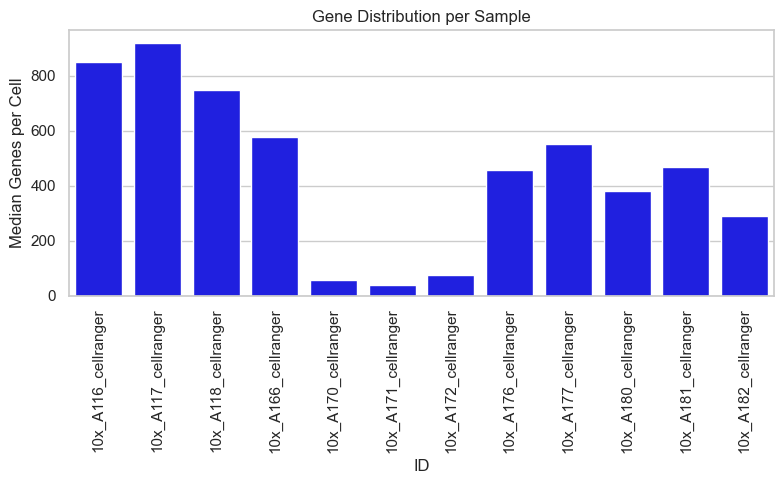

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x="ID", y="Median Genes per Cell", data=qc, color="Blue")
plt.xticks(rotation=90)
plt.title("Gene Distribution per Sample")
plt.tight_layout()
plt.show()


### Plot 2 estimate cell per sample

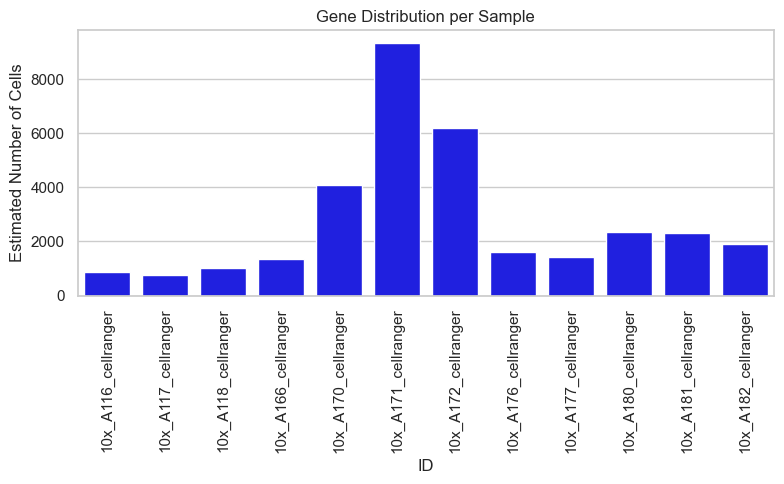

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x="ID", y="Estimated Number of Cells", data=qc, color="Blue")
plt.xticks(rotation=90)
plt.title("Gene Distribution per Sample")
plt.tight_layout()
plt.show()


### plot 3 - Genes Grouped by Age and Condition  

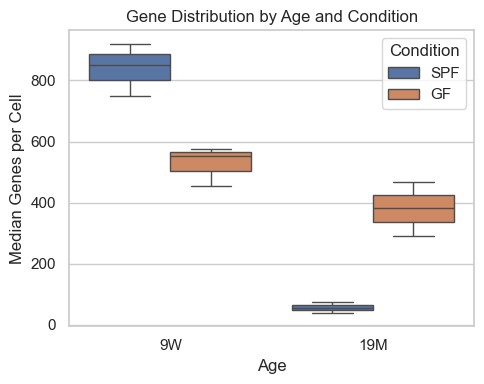

In [23]:
plt.figure(figsize=(5,4))
sns.boxplot(x="Age", y="Median Genes per Cell", hue="Condition", data=qc)
plt.title("Gene Distribution by Age and Condition")
plt.tight_layout()
plt.show()


### Plot 4 — Number of Cells Grouped by Age and Condition

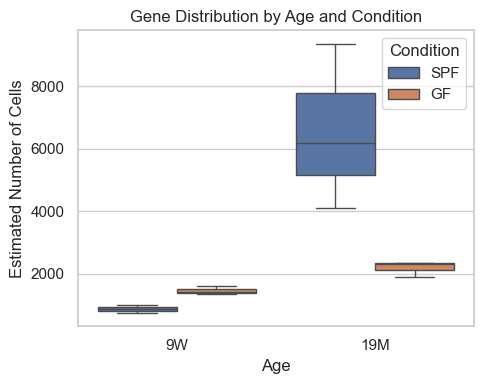

In [24]:
plt.figure(figsize=(5,4))
sns.boxplot(x="Age", y="Estimated Number of Cells", hue="Condition", data=qc)
plt.title("Gene Distribution by Age and Condition")
plt.tight_layout()
plt.show()


### Upload single cell data using scanpy

In [41]:
import scanpy as sc
import pandas as pd

# Read the two 10x filtered_feature_bc_matrix.h5 files
sample1 = sc.read_10x_h5(base_path + '/10x_A116_cellranger/' + "filtered_feature_bc_matrix.h5")
sample1.var_names_make_unique(); sample1.obs_names_make_unique()
sample2 = sc.read_10x_h5(base_path + '/10x_A117_cellranger/'+"filtered_feature_bc_matrix.h5")
sample2.var_names_make_unique(), sample2.obs_names_make_unique()
# Add metadata (condition / age)
sample1.obs['condition'] = 'SPF'
sample1.obs['age'] = 2

sample2.obs['condition'] = 'SPF'
sample2.obs['age'] = 19

# Optionally add sample IDs
sample1.obs['sample'] = 'A116_SPF_9w'
sample2.obs['sample'] = 'A117_SPF_9w'

# Combine both into one AnnData object
adata = sample1.concatenate(sample2, batch_key='batch')

# Check summary
print(adata)
adata.obs.head()


AnnData object with n_obs × n_vars = 1628 × 32285
    obs: 'condition', 'age', 'sample', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'


/Users/terooatt/miniconda3/envs/bio559r/lib/python3.11/site-packages/anndata/_core/anndata.py:1794: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/terooatt/miniconda3/envs/bio559r/lib/python3.11/site-packages/anndata/_core/anndata.py:1794: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/terooatt/miniconda3/envs/bio559r/lib/python3.11/site-packages/anndata/_core/anndata.py:1794: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/terooatt/miniconda3/envs/bio559r/lib/python3.11/site-packages/anndata/_core/anndata.py:1794: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/var/folders/8q/0m_1_8yj0r1_hxyz4br3vg4r0000gp/T/ipykernel_920/16410

,condition,age,sample,batch
AAACCTGCATACTACG-1-0,SPF,2,A116_SPF_9w,0
AAACCTGGTAGGCTGA-1-0,SPF,2,A116_SPF_9w,0
AAACGGGGTTGGTGGA-1-0,SPF,2,A116_SPF_9w,0
AAAGATGAGCGCCTTG-1-0,SPF,2,A116_SPF_9w,0
AAAGATGAGCTAGGCA-1-0,SPF,2,A116_SPF_9w,0


In [42]:
# --- Mouse gene flags ---
# Works whether your symbols are mt- / Mt- / MT- just in case
adata.var["mt"]   = adata.var_names.str.startswith(("mt-","Mt-","MT-"))

# Cytosolic and mitochondrial ribosomal proteins
adata.var["rps"]  = adata.var_names.str.startswith(("Rps","RPS"))
adata.var["rpl"]  = adata.var_names.str.startswith(("Rpl","RPL"))
adata.var["mrps"] = adata.var_names.str.startswith(("Mrps","MRPS"))
adata.var["mrpl"] = adata.var_names.str.startswith(("Mrpl","MRPL"))

# Hemoglobin (mouse)
adata.var["hb"] = (
    adata.var_names.str.startswith(("Hba-","Hbb-","Hbm","Hbd","Hbq1","Hbz","Hbe")) |
    adata.var_names.isin(["Hba","Hbb"])  # just in case symbols are short
)

sc.pp.calculate_qc_metrics(
    adata,
    qc_vars=["mt","rps","rpl","mrps","mrpl","hb"],
    percent_top=None,
    log1p=False,
    inplace=True
)

# Quick check
adata.obs[["n_genes_by_counts","total_counts","pct_counts_mt"]].describe()


,n_genes_by_counts,total_counts,pct_counts_mt
count,1628.000000,1628.000000,1628.000000
mean,946.998771,2508.157227,5.165312
std,522.910295,2490.076904,7.585479
min,17.000000,501.000000,0.000000
25%,604.750000,1207.250000,2.104523
50%,878.500000,1980.000000,3.299288
75%,1124.750000,2911.250000,5.193526
max,4579.000000,43316.000000,93.206520


In [43]:
adata.obs

,condition,age,sample,batch,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_rps,pct_counts_rps,total_counts_rpl,pct_counts_rpl,total_counts_mrps,pct_counts_mrps,total_counts_mrpl,pct_counts_mrpl,total_counts_hb,pct_counts_hb
AAACCTGCATACTACG-1-0,SPF,2,A116_SPF_9w,0,478,951.0,17.0,1.787592,23.0,2.418507,22.0,2.313354,1.0,0.105152,1.0,0.105152,0.0,0.000000
AAACCTGGTAGGCTGA-1-0,SPF,2,A116_SPF_9w,0,415,858.0,4.0,0.466200,18.0,2.097902,13.0,1.515152,1.0,0.116550,0.0,0.000000,1.0,0.116550
AAACGGGGTTGGTGGA-1-0,SPF,2,A116_SPF_9w,0,257,546.0,193.0,35.347984,12.0,2.197802,4.0,0.732601,0.0,0.000000,0.0,0.000000,0.0,0.000000
AAAGATGAGCGCCTTG-1-0,SPF,2,A116_SPF_9w,0,1134,3152.0,64.0,2.030457,606.0,19.225887,634.0,20.114214,8.0,0.253807,14.0,0.444162,0.0,0.000000
AAAGATGAGCTAGGCA-1-0,SPF,2,A116_SPF_9w,0,903,1812.0,82.0,4.525386,210.0,11.589404,221.0,12.196467,6.0,0.331126,5.0,0.275938,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCCAGGCGATA-1-1,SPF,19,A117_SPF_9w,1,1222,4332.0,118.0,2.723915,795.0,18.351801,910.0,21.006464,1.0,0.023084,5.0,0.115420,0.0,0.000000
TTTGTCACAGGAACGT-1-1,SPF,19,A117_SPF_9w,1,744,1694.0,44.0,2.597403,284.0,16.765053,271.0,15.997640,1.0,0.059032,3.0,0.177096,0.0,0.000000
TTTGTCAGTTTAGGAA-1-1,SPF,19,A117_SPF_9w,1,2263,8588.0,235.0,2.736377,1627.0,18.945040,1664.0,19.375874,12.0,0.139730,25.0,0.291104,1.0,0.011644
TTTGTCATCACCGGGT-1-1,SPF,19,A117_SPF_9w,1,1360,3583.0,90.0,2.511862,354.0,9.879990,418.0,11.666202,10.0,0.279096,11.0,0.307005,0.0,0.000000


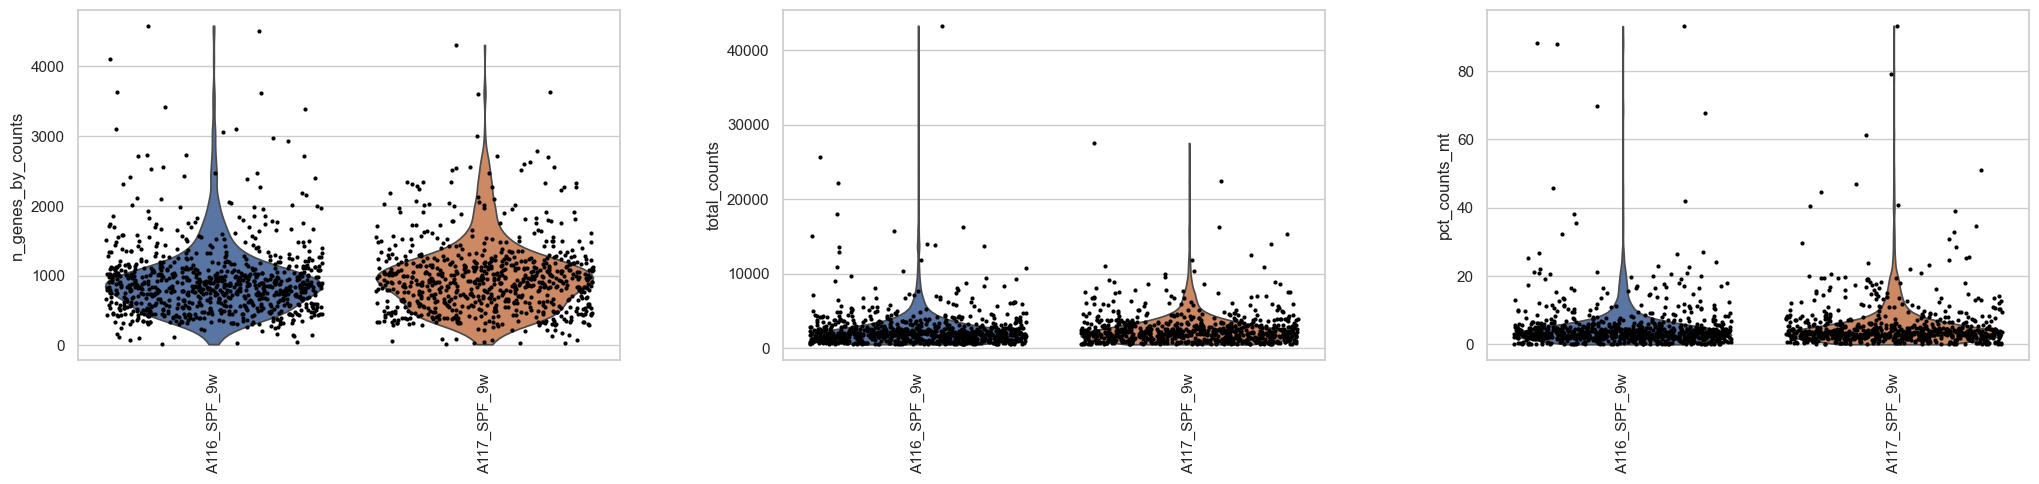

In [30]:
import scanpy as sc
import matplotlib.pyplot as plt

# Violin plots for core QC metrics
sc.pl.violin(
    adata,
    ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
    jitter=0.4,
    size=3,
    multi_panel=True,
    groupby='sample',  # or 'Condition' or 'Age'
    rotation=90,
    save="_violin_qc_metrics.png"   # saved as `violin_qc_metrics.png` in `figures/`
)


In [44]:
# Genes detected in at least 3 cells
sc.pp.filter_genes(adata, min_cells=3)

# Cell filters (tune as needed)
min_genes   = 100
max_genes   = 6000
min_counts  = 500
max_mito_pc = 15.0   # mouse often 5–15%; start at 15%

adata = adata[adata.obs["n_genes_by_counts"] >= min_genes, :].copy()
adata = adata[adata.obs["n_genes_by_counts"] <= max_genes, :].copy()
adata = adata[adata.obs["total_counts"] >= min_counts, :].copy()
adata = adata[adata.obs["pct_counts_mt"] <= max_mito_pc, :].copy()

print(f"After filtering: {adata.n_obs:,} cells, {adata.n_vars:,} genes")


After filtering: 1,531 cells, 12,585 genes


In [45]:
adata.obs

,condition,age,sample,batch,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_rps,pct_counts_rps,total_counts_rpl,pct_counts_rpl,total_counts_mrps,pct_counts_mrps,total_counts_mrpl,pct_counts_mrpl,total_counts_hb,pct_counts_hb
AAACCTGCATACTACG-1-0,SPF,2,A116_SPF_9w,0,478,951.0,17.0,1.787592,23.0,2.418507,22.0,2.313354,1.0,0.105152,1.0,0.105152,0.0,0.000000
AAACCTGGTAGGCTGA-1-0,SPF,2,A116_SPF_9w,0,415,858.0,4.0,0.466200,18.0,2.097902,13.0,1.515152,1.0,0.116550,0.0,0.000000,1.0,0.116550
AAAGATGAGCGCCTTG-1-0,SPF,2,A116_SPF_9w,0,1134,3152.0,64.0,2.030457,606.0,19.225887,634.0,20.114214,8.0,0.253807,14.0,0.444162,0.0,0.000000
AAAGATGAGCTAGGCA-1-0,SPF,2,A116_SPF_9w,0,903,1812.0,82.0,4.525386,210.0,11.589404,221.0,12.196467,6.0,0.331126,5.0,0.275938,0.0,0.000000
AAAGATGCACCATGTA-1-0,SPF,2,A116_SPF_9w,0,985,2147.0,102.0,4.750815,278.0,12.948300,319.0,14.857942,6.0,0.279460,6.0,0.279460,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCCAGGCGATA-1-1,SPF,19,A117_SPF_9w,1,1222,4332.0,118.0,2.723915,795.0,18.351801,910.0,21.006464,1.0,0.023084,5.0,0.115420,0.0,0.000000
TTTGTCACAGGAACGT-1-1,SPF,19,A117_SPF_9w,1,744,1694.0,44.0,2.597403,284.0,16.765053,271.0,15.997640,1.0,0.059032,3.0,0.177096,0.0,0.000000
TTTGTCAGTTTAGGAA-1-1,SPF,19,A117_SPF_9w,1,2263,8588.0,235.0,2.736377,1627.0,18.945040,1664.0,19.375874,12.0,0.139730,25.0,0.291104,1.0,0.011644
TTTGTCATCACCGGGT-1-1,SPF,19,A117_SPF_9w,1,1360,3583.0,90.0,2.511862,354.0,9.879990,418.0,11.666202,10.0,0.279096,11.0,0.307005,0.0,0.000000


In [ ]:
### Normalize, log, HVGs, regress, scale

In [ ]:
# library-size normalize each cell to 1e4 counts, then log1p
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# highly variable genes (Seurat v3 flavor works well)
sc.pp.highly_variable_genes(adata, n_top_genes=3000, flavor="seurat", subset=True)
print(f"HVGs kept: {adata.n_vars:,}")

# (optional) regress out total_counts and mito percentage, then scale
sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])
sc.pp.scale(adata, max_value=10)


In [ ]:
### Dimensionality reduction, neighbors, clustering, UMAP

In [48]:
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)  # adjust resolution for cluster granularity


/Users/terooatt/miniconda3/envs/bio559r/lib/python3.11/site-packages/scanpy/preprocessing/_pca/__init__.py:245: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  Version(ad.__version__) < Version("0.9")
/Users/terooatt/miniconda3/envs/bio559r/lib/python3.11/site-packages/scanpy/neighbors/__init__.py:430: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  if "X_diffmap" in adata.obsm_keys():
/Users/terooatt/miniconda3/envs/bio559r/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/8q/0m_1_8yj0r1_hxyz4br3vg4r0000gp/T/ipykernel_920/3975611150.py:4: FutureWarning: In the future, the default backend for leiden will be igraph

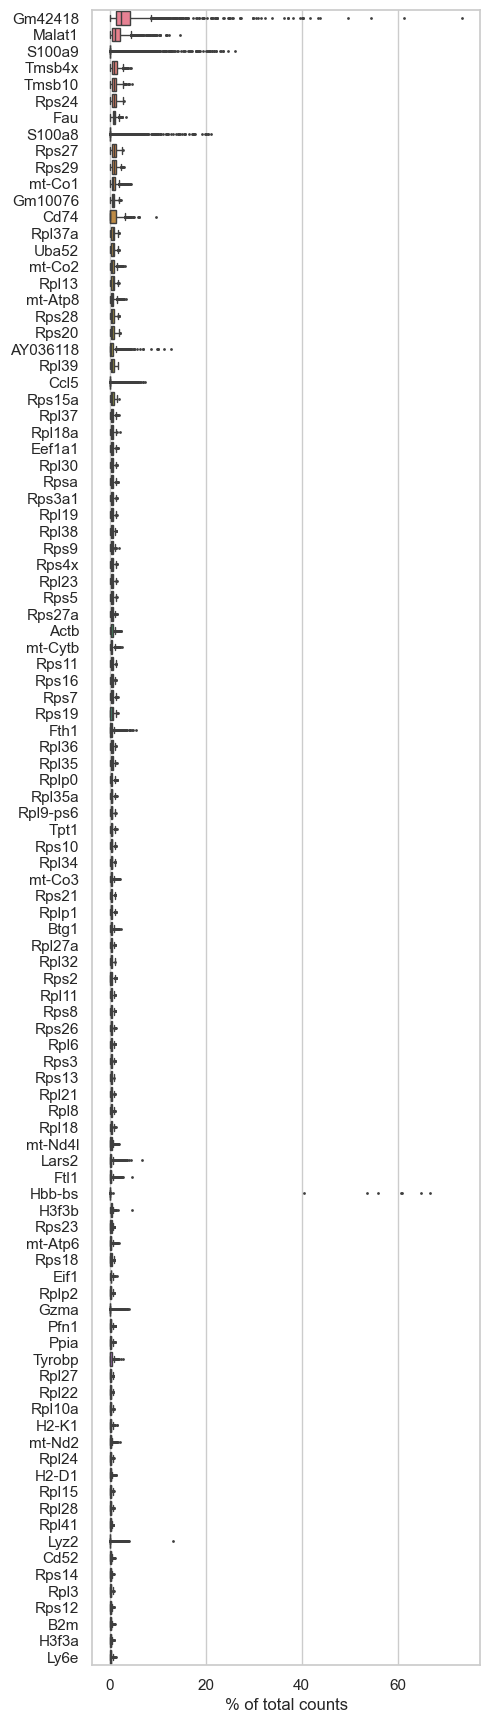

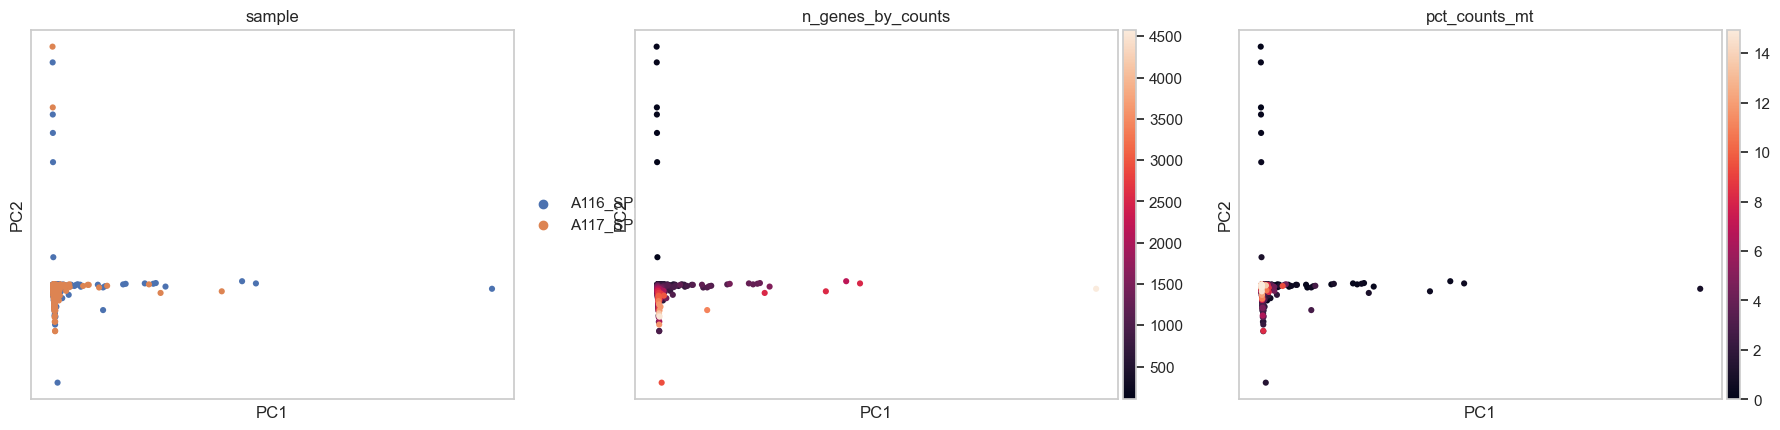

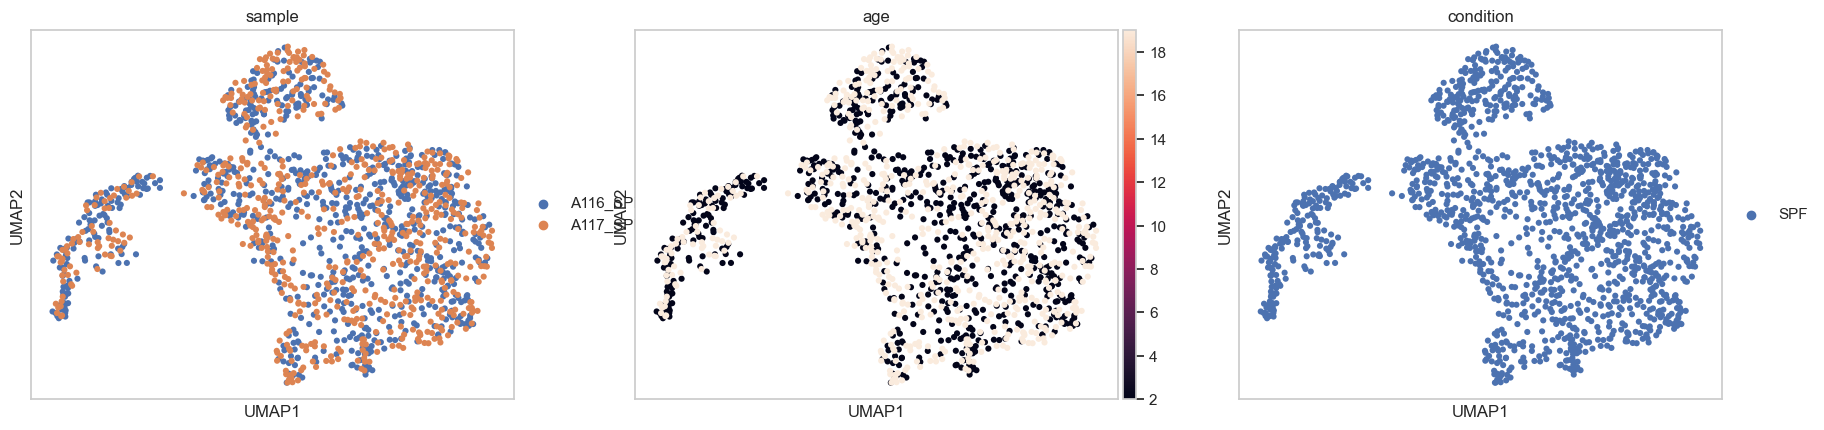

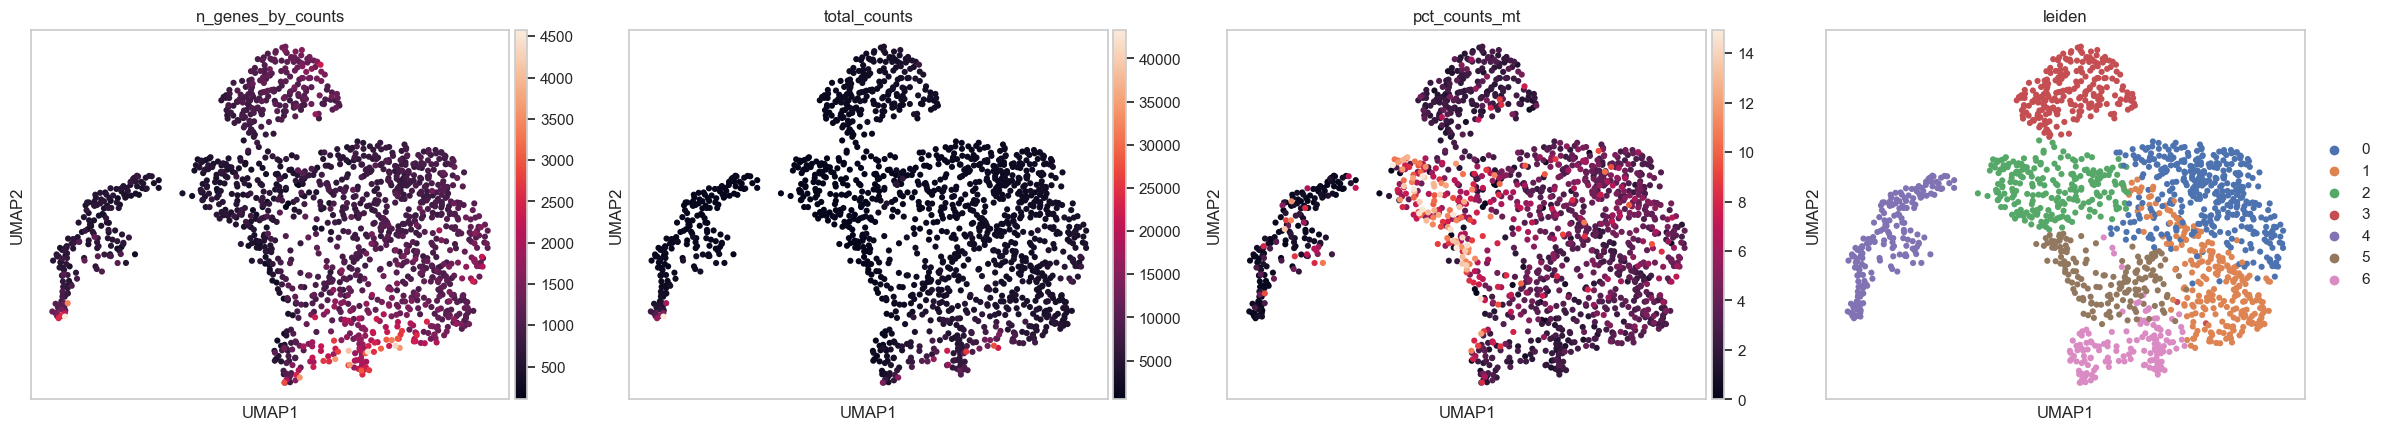

In [49]:
import matplotlib.pyplot as plt

# top expressed genes
sc.pl.highest_expr_genes(adata, n_top=100, show=False); plt.show()

# PCA
sc.pl.pca(adata, color=["sample","n_genes_by_counts","pct_counts_mt"], show=False); plt.show()

# UMAP with useful overlays
sc.pl.umap(adata, color=["sample","age","condition"], show=False); plt.show()
sc.pl.umap(adata, color=["n_genes_by_counts","total_counts","pct_counts_mt","leiden"], show=False); plt.show()
